## Predicting Concrete Strength using Regularized Regression
--------------------------

#### 📖 Background <br>
You work in the civil engineering department of a major university. You are part of a project testing the strength of concrete samples.

Concrete is the most widely used building material in the world. It is a mix of cement and water with gravel and sand. It can also include other materials like fly ash, blast furnace slag, and additives.

The compressive strength of concrete is a function of components and age, so your team is testing different combinations of ingredients at different time intervals.

The project leader asked you to find a simple way to estimate strength so that students can predict how a particular sample is expected to perform.

#### 💾 The data <br>
The team has already tested more than a thousand samples (source):

Compressive strength data:
- "cement" - Portland cement in kg/m3
- "slag" - Blast furnace slag in kg/m3
- "fly_ash" - Fly ash in kg/m3
- "water" - Water in liters/m3
- "superplasticizer" - Superplasticizer additive in kg/m3
- "coarse_aggregate" - Coarse aggregate (gravel) in kg/m3
- "fine_aggregate" - Fine aggregate (sand) in kg/m3
- "age" - Age of the sample in days
- "strength" - Concrete compressive strength in megapascals (MPa)

#### Import libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Define functions

In [44]:
def skew_label(df, col):
    skew = round(df[col].skew(),2)
    
    if skew < -1 or skew > 1:
        label = 'Highly Skewed'
    elif skew >= -1 and skew <= -.5:
        label = 'Moderately Skewed'
    elif skew <= 1 and skew >= .5:
        label = 'Moderately Skewed'
    else:
        label = 'Approximately Symmetric'
    
    return label

#### Import dataset

In [45]:
data = pd.read_csv(r"C:\Users\GRACE ESTRADA\OneDrive\Desktop\DataCamp\data\concrete_data.csv")
data.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


#### Separate target and feature variables

In [46]:
target = data.strength
features = data.drop(['strength'], axis = 1)

### Exploratory Data Analysis

#### Distribution (Untransformed Features)

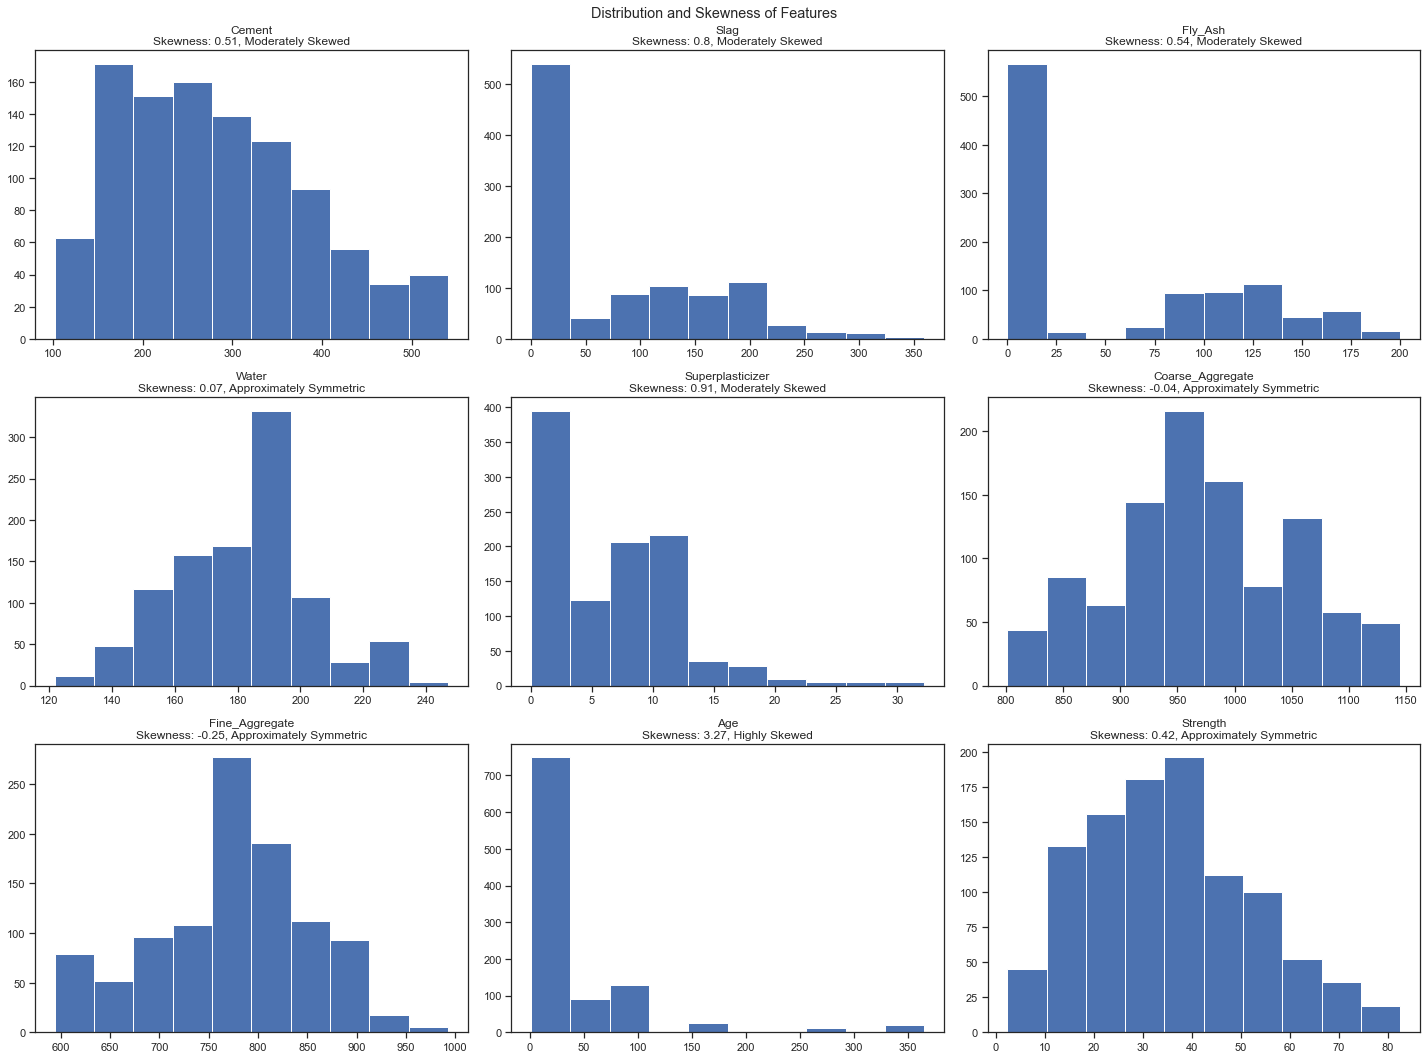

In [47]:
fig, axes = plt.subplots(3,3, figsize = (20,15))
plt.suptitle('Distribution and Skewness of Features')

for col, ax in zip(data, axes.flat):
    # plot histogram
    data[col].hist(grid = False, ax = ax)

    #calculate skewness
    skew = round(data[col].skew(),2)
    
    #label the skewness value
    label = skew_label(data, col)

    #plot titles
    ax.set_title(f"{col.title()}\nSkewness: {skew}, {label}")

plt.tight_layout()

#### Log Transform

In [48]:
data_log = np.log(data[features.columns])
data_log = data_log.join(data['strength'])

#### Distribution (Transformed Features)

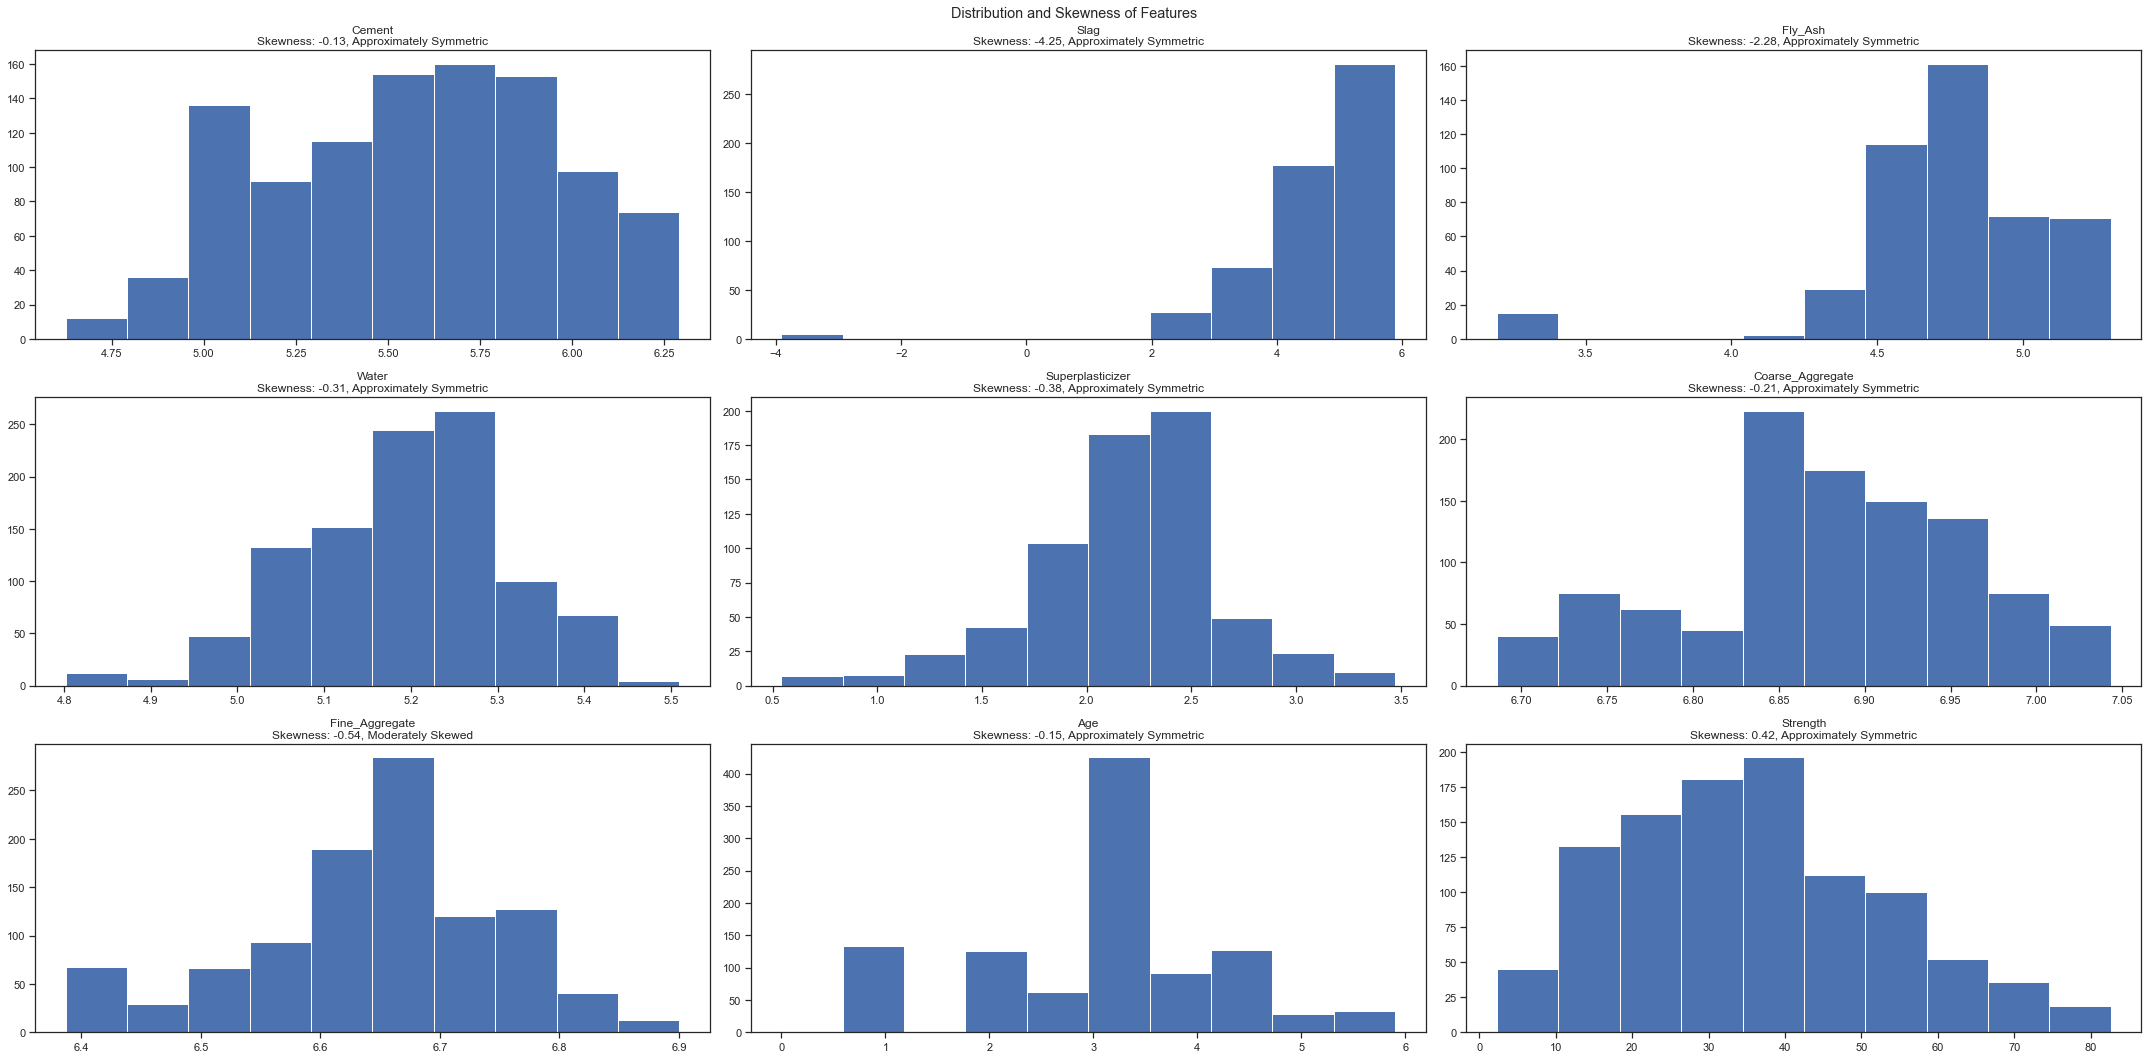

In [54]:
#initialize figure and axes
fig, axes = plt.subplots(3,3, figsize = (30,15))
#set figure title
plt.suptitle('Distribution and Skewness of Features')

for col, ax in zip(data_log, axes.flat):
    # plot histogram
    data_log[np.isfinite(data_log[col])][col].hist(grid = False, ax = ax)

    #calculate skewness
    skew = round(data_log[np.isfinite(data_log[col])][col].skew(),2)
    
    #label the skewness value
    label = skew_label(data_log, col)

    #plot titles
    ax.set_title(f"{col.title()}\nSkewness: {skew}, {label}")

plt.tight_layout()

#### Relationship (Untransformed Features)

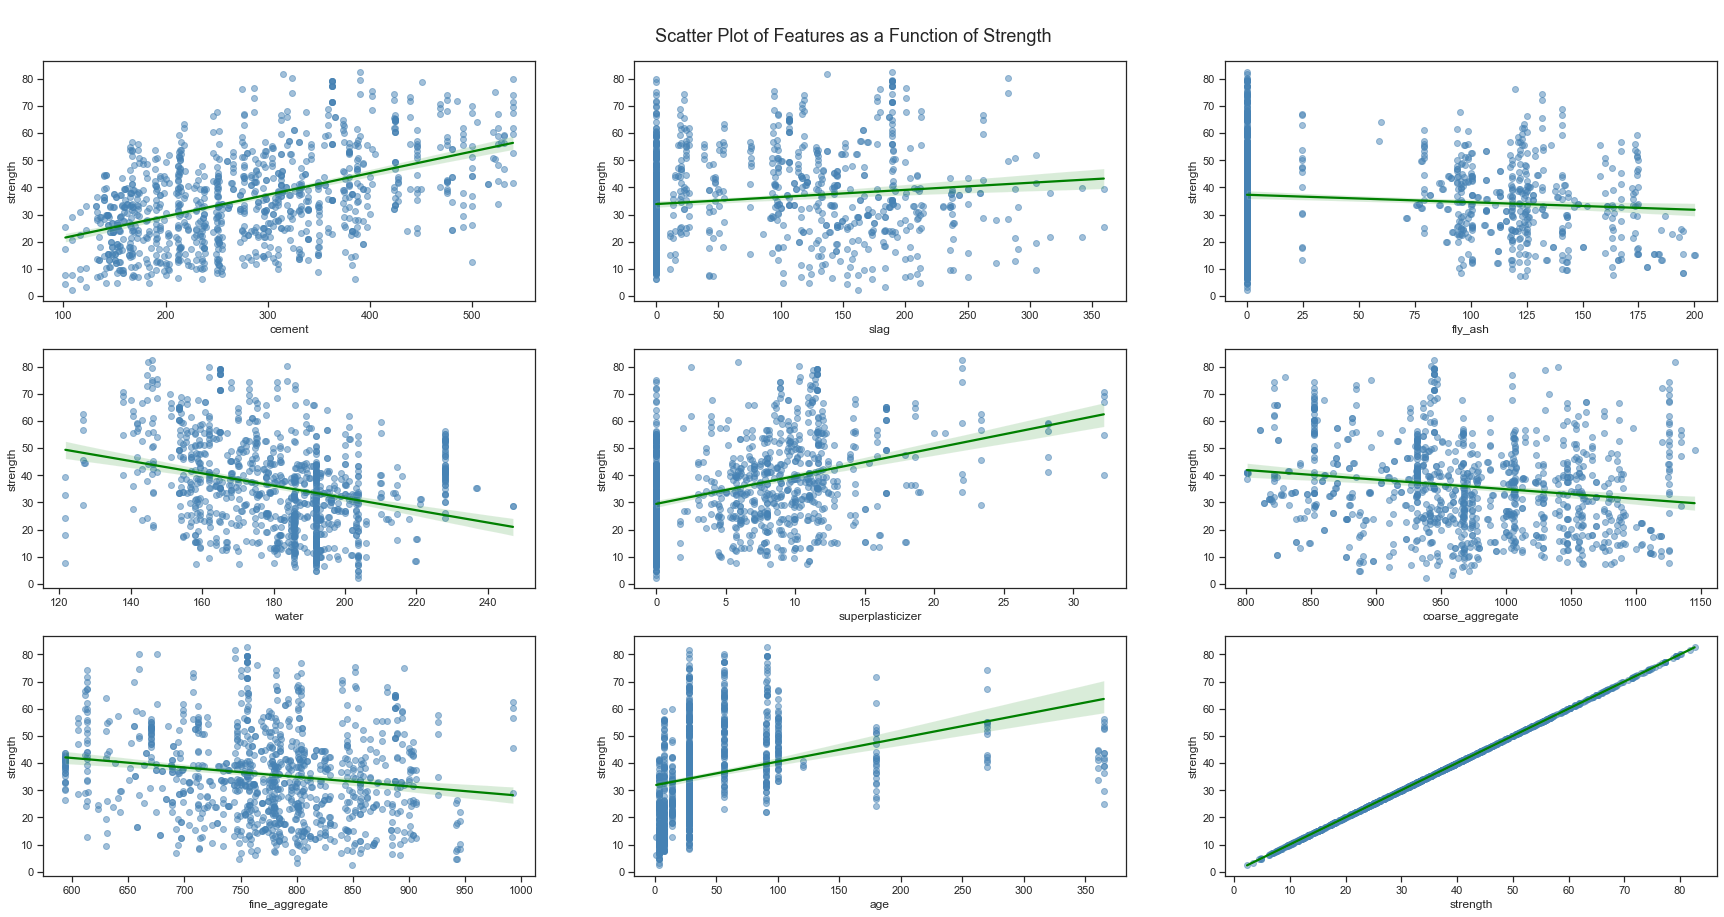

In [55]:
#set plot style
sns.set(style = 'ticks')

#initialize figure and axes
fig, axes = plt.subplots(3,3, figsize = (30,15))
#set figure title
plt.suptitle('\nScatter Plot of Features as a Function of Strength\n\n', y = .93, size = 18)

#plot scatter plot
for col, ax in zip(data, axes.flat):
    sns.regplot(x = col, y = 'strength', data = data, scatter_kws={"color": "steelblue", "alpha":.5}, line_kws={"color": "green"}, ax = ax);


plt.show()


#### Relationship (Transformed Features)

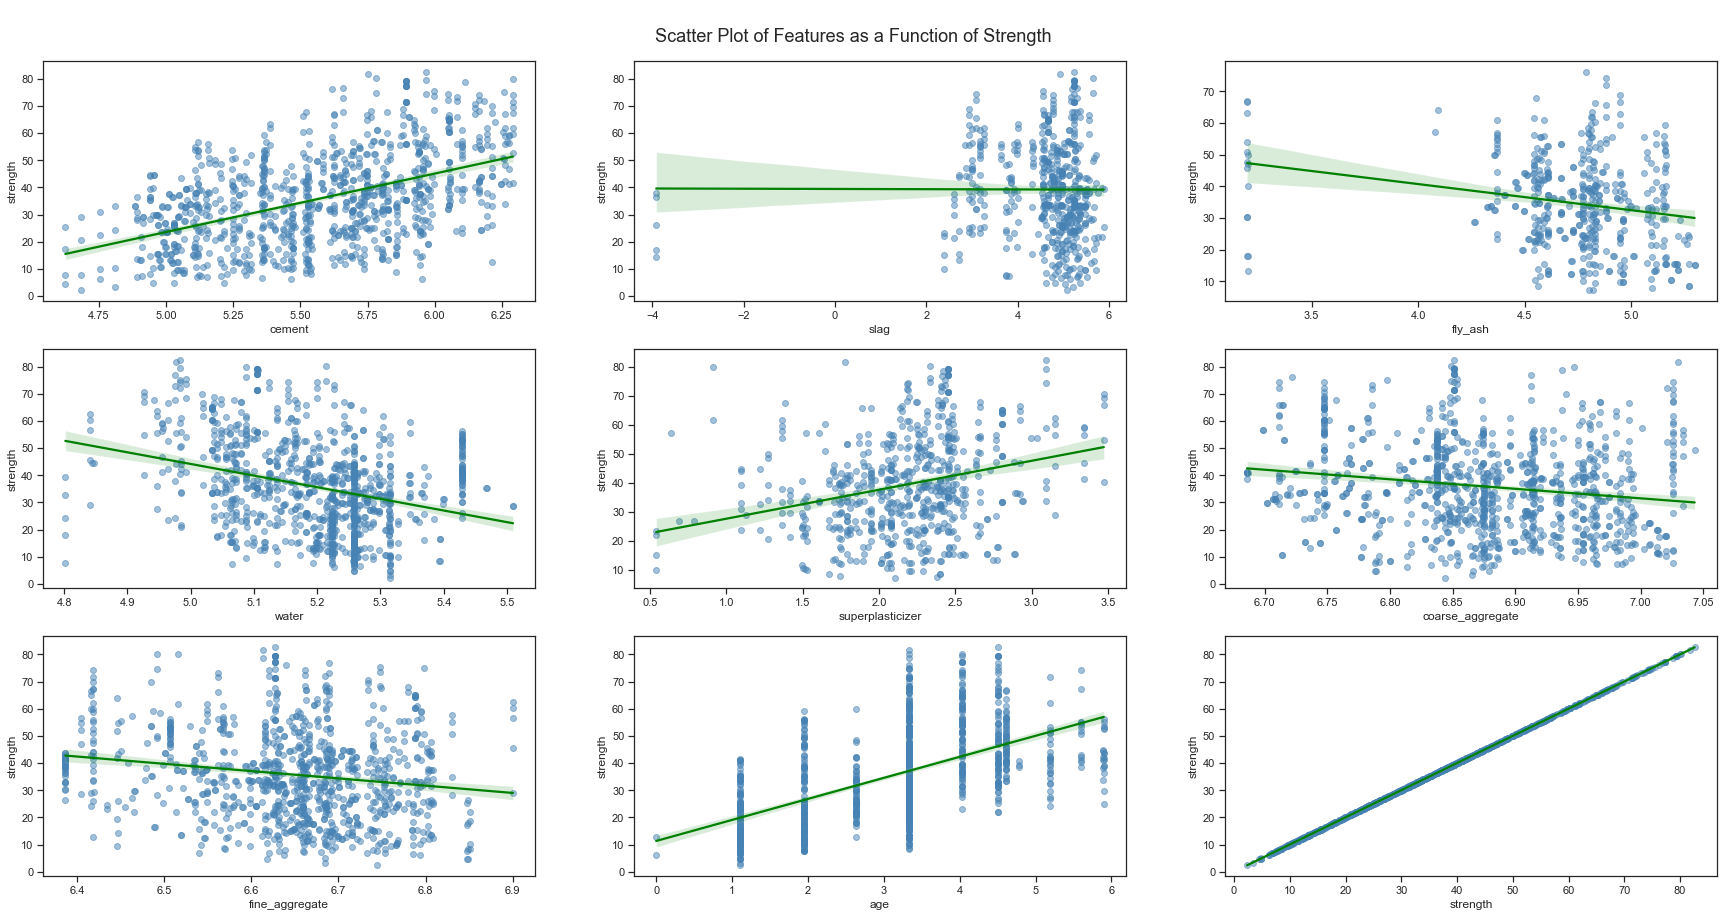

In [56]:
#set plot style
sns.set(style = 'ticks')

#initialize figure and axes
fig, axes = plt.subplots(3,3, figsize = (30,15))
#set figure title
plt.suptitle('\nScatter Plot of Features as a Function of Strength\n\n', y = .93, size = 18)

#plot scatter plot
for col, ax in zip(data, axes.flat):
    sns.regplot(x = col, y = 'strength', data = data_log[np.isfinite(data_log)], scatter_kws={"color": "steelblue", "alpha":.5}, line_kws={"color": "green"}, ax = ax);


plt.show()


#### Correlation (Untransformed Features)

In [57]:
#correlation coefficient
data.corr().iloc[-1]

cement              0.497833
slag                0.134824
fly_ash            -0.105753
water              -0.289613
superplasticizer    0.366102
coarse_aggregate   -0.164928
fine_aggregate     -0.167249
age                 0.328877
strength            1.000000
Name: strength, dtype: float64

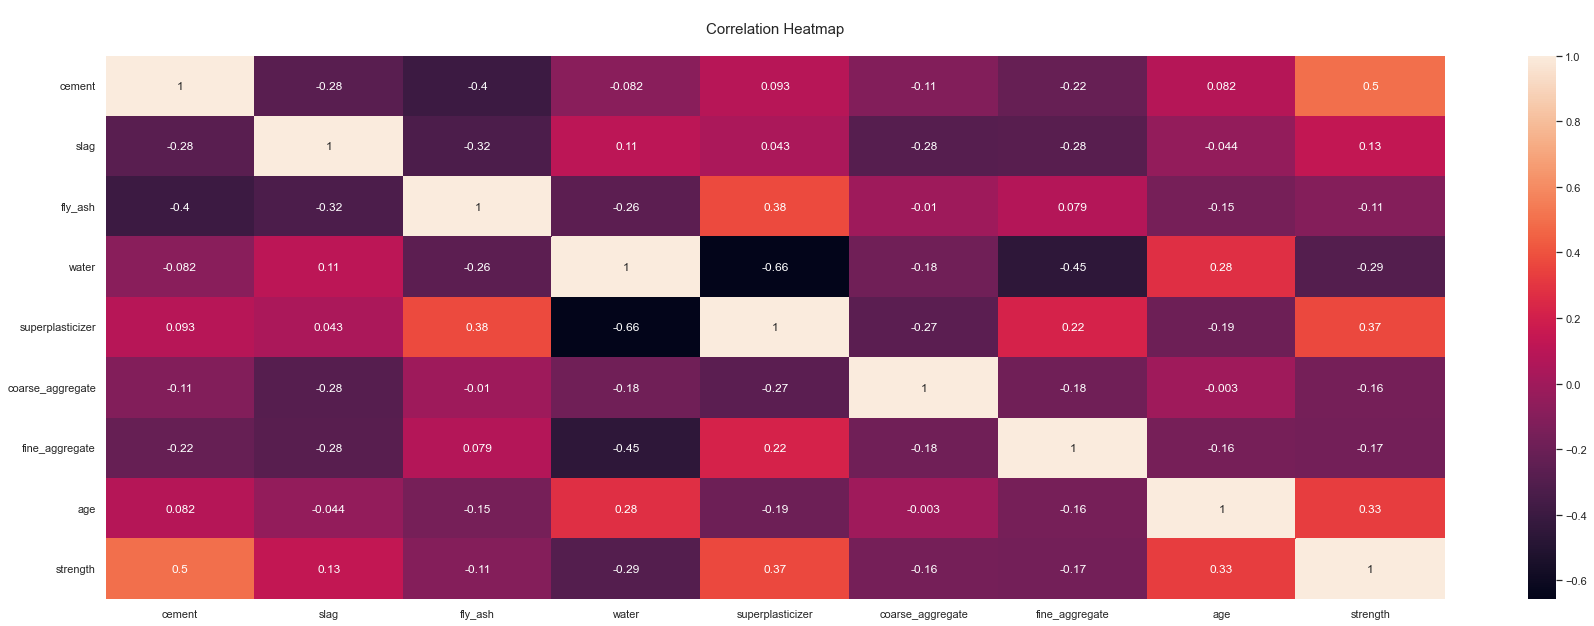

In [58]:
#plot heatmap of correlation coefficient

sns.set(rc={'figure.figsize':(30,10)})
sns.heatmap(data.corr(), annot = True)

plt.title('\nCorrelation Heatmap\n', fontsize = 15);


#### Correlation (Transformed Features)

In [59]:
#correlation coefficient
data_log.corr().iloc[-1]

cement              0.490638
slag               -0.002700
fly_ash            -0.210949
water              -0.305973
superplasticizer    0.271424
coarse_aggregate   -0.169287
fine_aggregate     -0.170817
age                 0.552185
strength            1.000000
Name: strength, dtype: float64

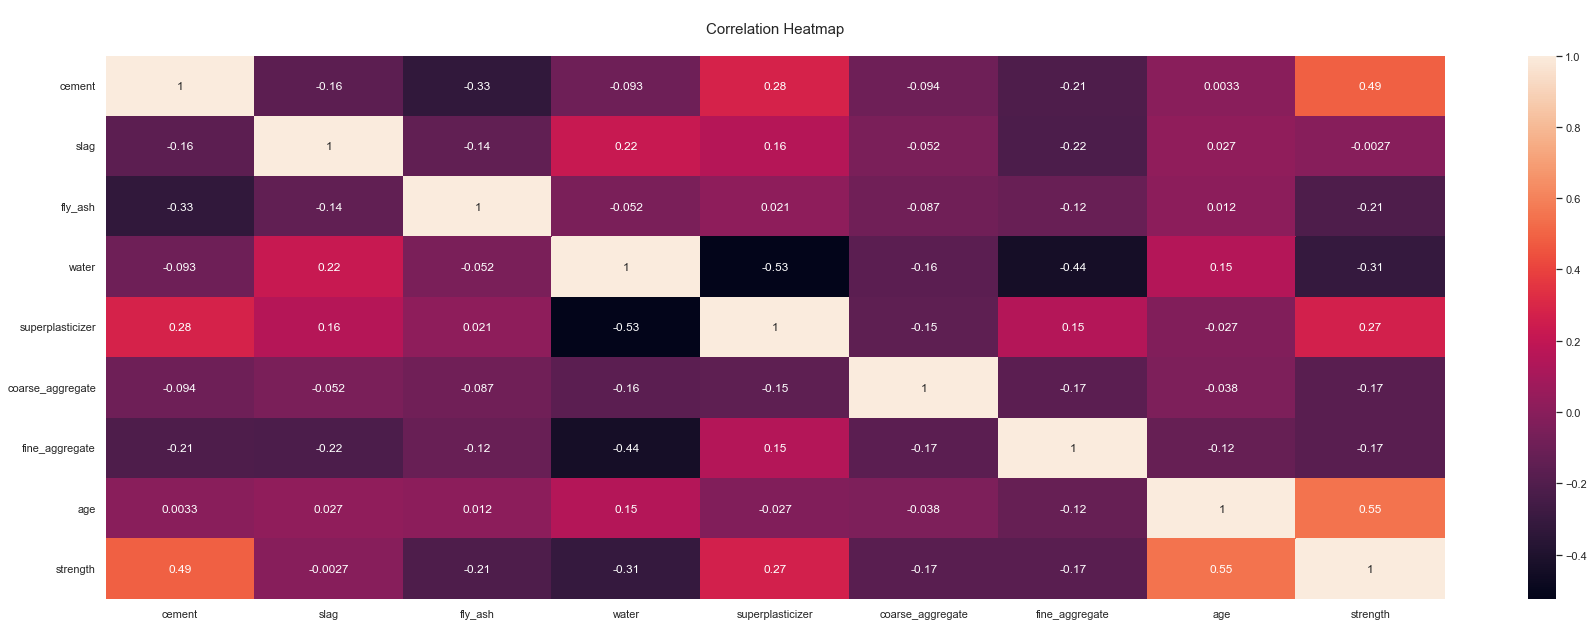

In [60]:
#plot heatmap of correlation coefficient

sns.set(rc={'figure.figsize':(30,10)})
sns.heatmap(data_log.corr(), annot = True)

plt.title('\nCorrelation Heatmap\n', fontsize = 15);


### Modelling

#### Linear Regression w/o transformation

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [62]:
y = data['strength']
X = data.drop(['strength'], axis = 1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, shuffle = True, random_state = 1006)

In [64]:
linear_model = LinearRegression()

In [65]:
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
y_pred_linear_score = r2_score(y_test, y_pred_linear)
print(f'R-squared: {y_pred_linear_score}')

R-squared: 0.5314622514158898


#### Linear Regression w/ transformation

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

In [67]:
y = data['strength']
X = data.drop(['strength'], axis = 1)

In [68]:
X = X.replace(0, .00001) #replace 0 values wih .00001 to avoid inf values

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, shuffle = True, random_state = 1006)

In [70]:
pipe = make_pipeline(FunctionTransformer(np.log),
                     StandardScaler(),
                     LinearRegression())

In [88]:
pipe.fit(X_train, y_train)
y_pred_linear_t = pipe.predict(X_test)
y_pred_linear_t_score = r2_score(y_test, y_pred_linear_t)
print(f'R-squared: {y_pred_linear_t_score}')


R-squared: 0.9114024061201418


#### Ridge Regression

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [73]:
y = data['strength']
X = data.drop(['strength'], axis = 1)

In [74]:
X = X.replace(0, .00001) #replace 0 values wih .00001 to avoid inf values

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, shuffle = True, random_state = 1006)

WITHOUT POLYNOMIAL FEATURES

In [76]:
pipe = Pipeline([('function_transformer', FunctionTransformer(np.log)),
                 ('scaler', StandardScaler()),
                 ('ridge_regression', Ridge())])
                     
params = {'ridge_regression__alpha': [.001, .01, .1, 1, 10]}

grid = GridSearchCV(pipe, params, cv = 5)

grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.7984848201977862, {'ridge_regression__alpha': 1})

WITH POLYNOMIAL FEATURES

In [77]:
estimator = Pipeline([("function_transformer", FunctionTransformer(np.log)),
                      ("scaler", StandardScaler()),
                      ("polynomial_features", PolynomialFeatures()),
                      ("ridge_regression", Ridge())])
                     
params = {'polynomial_features__degree': [1,2,3,4,5],
          'ridge_regression__alpha': [.001, .01, .1, 1, 10]}

grid = GridSearchCV(estimator, params, cv = 5)

grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.8785552672669488,
 {'polynomial_features__degree': 3, 'ridge_regression__alpha': 10})

#### Lasso Regression

In [78]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [79]:
y = data['strength']
X = data.drop(['strength'], axis = 1)

In [80]:
X = X.replace(0, .00001)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, shuffle = True, random_state = 1006)

WITHOUT POLYNOMIAL FEATURES

In [82]:
pipe = Pipeline([('function_transformer', FunctionTransformer(np.log)),
                 ('scaler', StandardScaler()),
                 ('lasso_regression', Lasso())])
                     
params = {'lasso_regression__alpha': [.001, .01, .1, 1, 10]}

grid = GridSearchCV(pipe, params, cv = 5)

grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.798470826361584, {'lasso_regression__alpha': 0.01})

WITH POLYNOMIAL FEATURES

In [83]:
estimator = Pipeline([("function_transformer", FunctionTransformer(np.log)),
                      ("scaler", StandardScaler()),
                      ("polynomial_features", PolynomialFeatures()),
                      ("lasso_regression", Lasso(normalize = True, max_iter=100000))]) #normalize = True to help the model converge (Gradient Descent)
                     
params = {'polynomial_features__degree': [1,2,3,4,5],
          'lasso_regression__alpha': [.001, .01, .1, 1, 10]}

grid = GridSearchCV(estimator, params, cv = 5)

grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.8865218425025491,
 {'lasso_regression__alpha': 0.001, 'polynomial_features__degree': 5})

#### FINAL - RIDGE

In [89]:
pipe = Pipeline([("function_transformer", FunctionTransformer(np.log)),
                      ("scaler", StandardScaler()),
                      ("polynomial_features", PolynomialFeatures(3)),
                      ("ridge_regression", Ridge(alpha = 10))])
                     
pipe.fit(X_train, y_train)
y_pred_r = pipe.predict(X_test)

y_pred_r_score = r2_score(y_test, y_pred_r)
print(f'R-squared: {y_pred_r_score}')

R-squared: 0.9165095696505395


In [85]:
print((pipe.named_steps.ridge_regression.coef_ != 0).sum())
print((pipe.named_steps.ridge_regression.coef_ == 0).sum())

164
1


#### FINAL - LASSO

In [117]:
pipe = Pipeline([("function_transformer", FunctionTransformer(np.log)),
                      ("scaler", StandardScaler()),
                      ("polynomial_features", PolynomialFeatures(3)),
                      ("lasso_regression", Lasso(normalize = True, max_iter = 100000, alpha = .001))])
                     
pipe.fit(X_train, y_train)
y_pred_l = pipe.predict(X_test)

y_pred_l_score = r2_score(y_test, y_pred_l)
print(f'R-squared: {y_pred_l_score}')

R-squared: 0.9114024061201418


In [118]:
print((pipe.named_steps.lasso_regression.coef_ != 0).sum())
print((pipe.named_steps.lasso_regression.coef_ == 0).sum())

103
62


#### Conclusion

The `RidgeRegression` with an `alpha` of `10` and on the `5th degree polynomial` performs slightly better than the `LassoRegression` with alpha of `.001` with a `3rd degree polynomial`. <br>
The difference between the two models are immaterial, thus it is more practical to choose `LassoRegression` as it contains fewer coefficients, and has a lesser chance of being overfitted than that of the `RidgeRegression`. 

In [139]:
#convert the actual and predicted values into a dataframe

actual_pred = pd.DataFrame(zip(y_test, y_pred_l))
actual_pred.columns = ['actual', 'predictions']
actual_pred

,actual,predictions
0,10.089792,9.651087
1,37.431652,30.687346
2,13.120728,13.306607
3,38.700288,34.641277
4,12.638095,22.380267
...,...,...
201,17.275511,17.377961
202,12.176146,14.011249
203,15.575263,17.012874
204,9.131420,6.290124


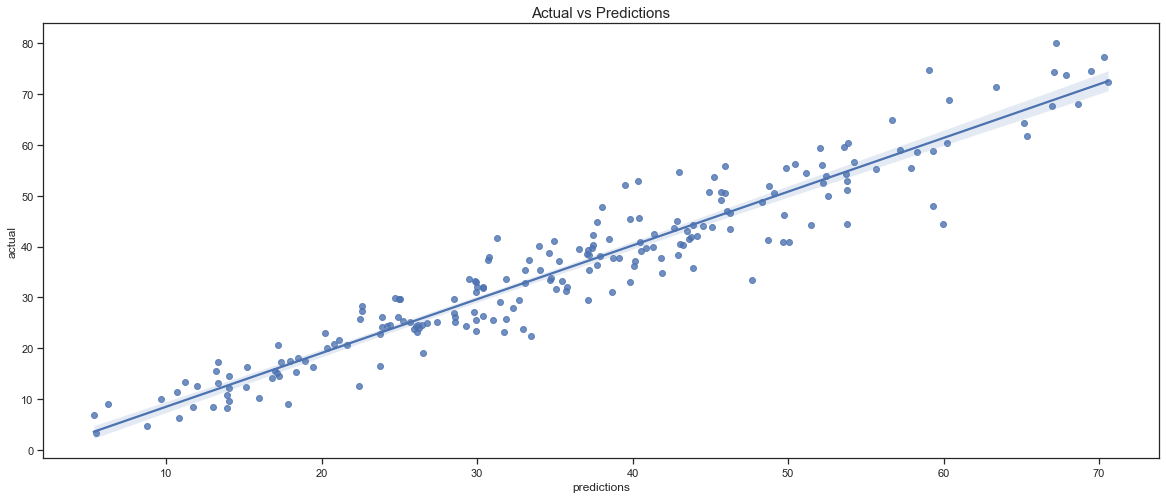

In [138]:
#Plot actual against predicted values

sns.set(style = 'ticks',
        rc={'figure.figsize':(20,8)})
sns.regplot(x = 'predictions', y = 'actual', data = actual_pred)

plt.title('Actual vs Predictions', fontsize = 15);

#### - END - 